In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Random forest, svr, decision tree params adjust and theory randomforest
# testing many dataframe for each model
# eda for each solution

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training10.csv")
df.head()
corr=df.corr()

In [3]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.187647,-0.150612,0.228492,0.030433,-0.394900,-0.393929,-0.401973,0.286089,0.209935,-0.056868,...,-0.423426,NaN,-0.139545,-0.051458,-0.030231,-0.049619,-0.338044,0.273673,NaN,1.000000
BsmtQual_Ex,-0.019162,0.029625,-0.004661,0.153260,-0.114671,-0.048726,-0.053646,0.226263,0.196354,-0.036025,...,-0.206695,NaN,-0.045265,-0.014686,-0.024430,-0.031567,-0.170257,0.307506,NaN,0.451608
KitchenQual_Ex,-0.008671,-0.015889,-0.001595,0.123222,-0.057121,-0.059439,-0.059953,0.120338,0.146168,-0.038462,...,-0.133922,NaN,0.049378,-0.013164,-0.021899,-0.028297,-0.165153,0.190471,NaN,0.409421
ExterQual_Ex,-0.043465,-0.002081,0.037454,0.084736,-0.084612,-0.086550,-0.088374,0.216657,0.111300,-0.034108,...,-0.192771,NaN,-0.046799,-0.009523,-0.015841,-0.020469,-0.160383,0.240313,NaN,0.404878
Neighborhood_NridgHt,0.079830,0.011417,-0.060334,0.180990,-0.053661,0.014349,0.010042,0.207970,0.098621,-0.051179,...,-0.091817,NaN,-0.056647,-0.011527,-0.019174,-0.024776,-0.048898,0.173688,NaN,0.313647
ExterQual_Gd,0.244144,0.127291,-0.271118,0.500648,0.062334,0.222969,0.213852,0.138024,0.093554,-0.080887,...,0.020290,NaN,-0.045175,-0.033648,-0.050994,-0.038926,0.054771,0.242718,NaN,0.307234
Foundation_PConc,0.294030,0.138138,-0.309576,0.539514,0.079992,0.286325,0.275757,0.187246,0.134822,-0.131092,...,0.067493,NaN,-0.068619,0.020954,-0.042032,-0.034403,0.078990,0.286249,NaN,0.306703
Fireplaces,0.063250,0.047981,-0.071323,0.203926,-0.014197,0.007862,0.003995,0.146287,0.132208,-0.002821,...,-0.008842,NaN,-0.092457,-0.046835,-0.022880,-0.004424,0.044421,0.036288,NaN,0.296400
Neighborhood_NoRidge,-0.053253,0.002040,0.061684,-0.005377,-0.120317,-0.107713,-0.110160,0.197925,0.082584,-0.044654,...,-0.039500,NaN,-0.001196,-0.008586,-0.014284,-0.018456,-0.044507,-0.047499,NaN,0.292830
MasVnrArea,0.226652,0.020592,-0.232376,0.282195,0.032106,0.138909,0.130019,1.000000,0.209548,-0.087016,...,0.046362,NaN,-0.007775,-0.012815,0.015781,0.050269,0.038061,0.075631,NaN,0.286089


In [4]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [5]:
model=RandomForestRegressor()

In [6]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [7]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc',
       'Fireplaces', 'Neighborhood_NoRidge', 'MasVnrArea'],
      dtype='object')

In [8]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,30572.529980,42427.403757,0.765318
1,11,30438.707256,42090.407198,0.769032
2,12,29552.025236,41038.424965,0.780433
3,13,28742.753201,39696.761998,0.794555
4,14,28962.315340,40084.286987,0.790524
...,...,...,...,...
105,115,22961.514692,35942.194284,0.831579
106,116,22895.166952,36235.034132,0.828824
107,117,22596.566370,35069.312938,0.839660
108,118,23224.698973,35936.615946,0.831632


In [9]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
24,34,22015.680103,34009.587314,0.849204
16,26,22104.793836,33716.810274,0.851789
30,40,22184.375788,34409.270494,0.845639
21,31,22195.210616,33978.906882,0.849476
15,25,22214.901233,34438.408851,0.845378
...,...,...,...,...
3,13,28742.753201,39696.761998,0.794555
4,14,28962.315340,40084.286987,0.790524
2,12,29552.025236,41038.424965,0.780433
1,11,30438.707256,42090.407198,0.769032


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


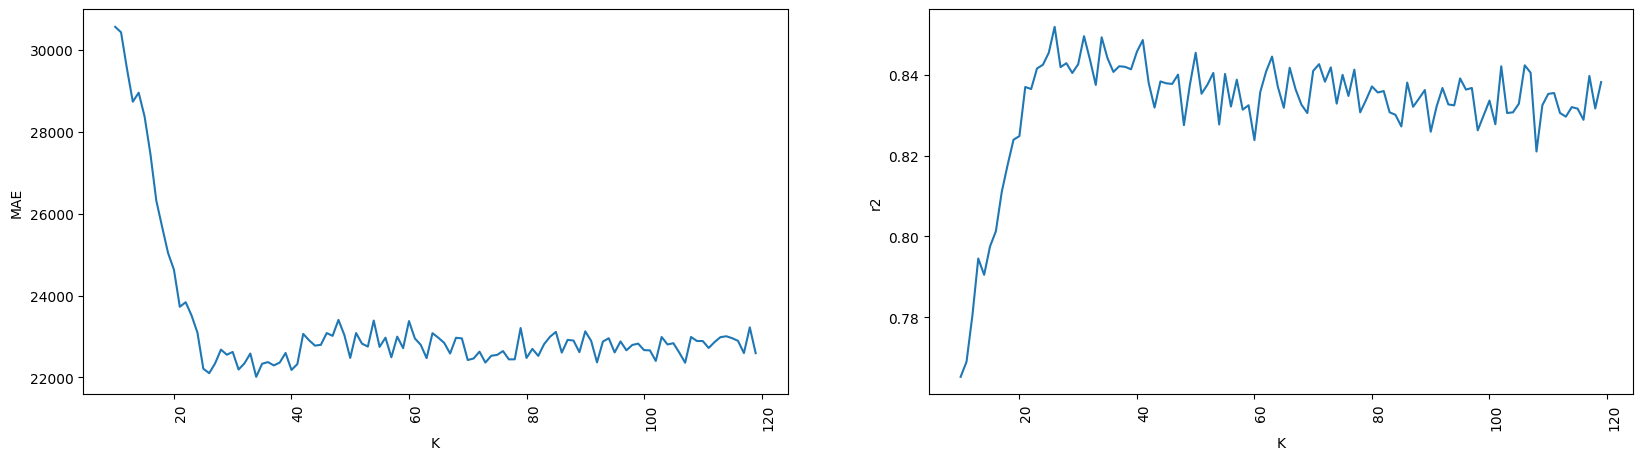

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [11]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               3.261382e-02
LotFrontage              5.107832e-03
LotArea                  2.617346e-02
OverallQual              2.393219e-02
OverallCond              1.685412e-02
                             ...     
SaleCondition_Family     3.132392e-03
SaleCondition_Normal     4.913976e-02
SaleCondition_Partial    2.113360e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [12]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [15]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,21319.378733,35671.134819,0.834110
1,101,21694.548459,35433.558389,0.836312
2,102,22054.395479,35469.894694,0.835977
3,103,22222.512637,36559.394256,0.825745
4,104,21891.812842,35326.991161,0.837296
...,...,...,...,...
395,495,22229.894384,34931.686753,0.840916
396,496,21935.727740,35041.506837,0.839915
397,497,22185.889795,36107.985585,0.830022
398,498,21667.233630,35175.551968,0.838688


In [16]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,100,21319.378733,35671.134819,0.834110
6,106,21339.416404,35073.365998,0.839623
132,232,21363.508664,34906.969045,0.841142
391,491,21363.932534,34620.320338,0.843740
143,243,21367.381062,34512.473048,0.844712
...,...,...,...,...
266,366,22513.000822,36208.750202,0.829072
20,120,22529.160445,36655.241039,0.824831
53,153,22594.928699,36305.995801,0.828153
91,191,22664.794932,37219.755201,0.819394


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


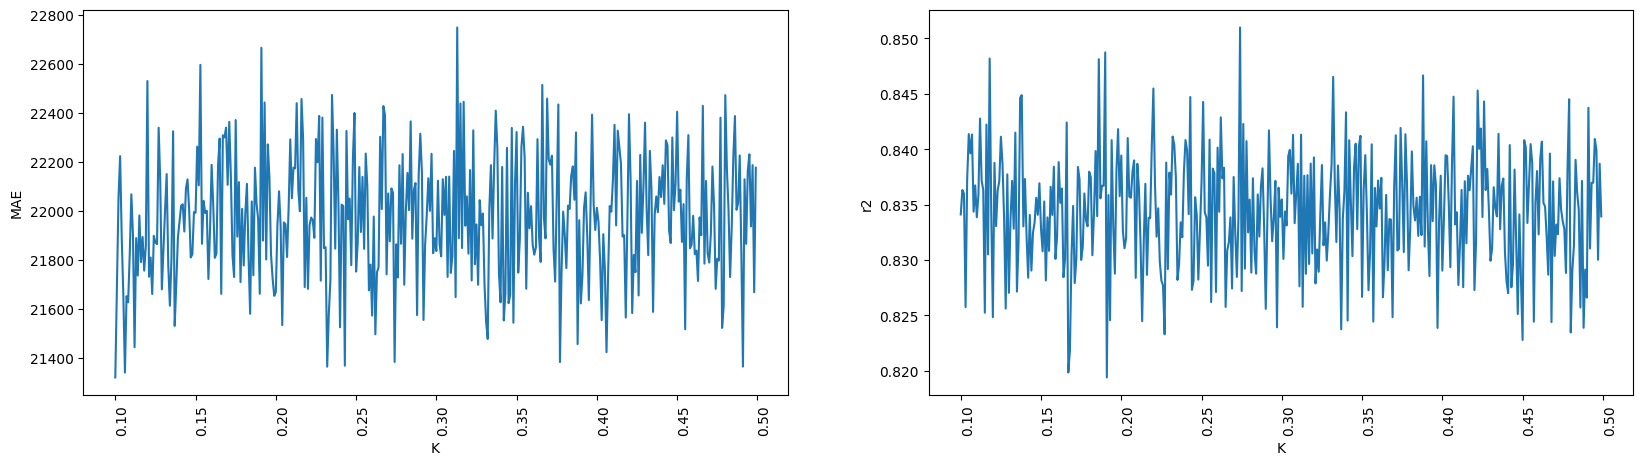

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


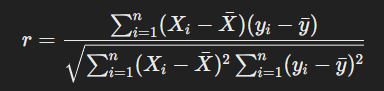

### Using numpy

In [18]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [19]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.0304326175489076


In [20]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[]

### Using sklearn

In [21]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'KitchenQual_Ex'], dtype=object)

In [22]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,37221.235790,52001.390938,0.647454
1,6,36443.937876,52561.656152,0.639816
2,7,33389.411981,47509.723832,0.705726
3,8,31749.796053,44032.897760,0.747221
4,9,30612.407250,42564.906729,0.763795
...,...,...,...,...
110,115,22610.351062,35147.039738,0.838949
111,116,22709.013493,34935.174030,0.840885
112,117,22750.625753,35333.087340,0.837239
113,118,22982.032466,36248.172792,0.828700


In [23]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
19,24,21660.467671,33488.157760,0.853793
21,26,21921.778699,33699.040232,0.851946
34,39,21975.530342,34115.233449,0.848266
20,25,22035.795959,33943.845391,0.849787
28,33,22088.074075,34581.067653,0.844094
...,...,...,...,...
4,9,30612.407250,42564.906729,0.763795
3,8,31749.796053,44032.897760,0.747221
2,7,33389.411981,47509.723832,0.705726
1,6,36443.937876,52561.656152,0.639816


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


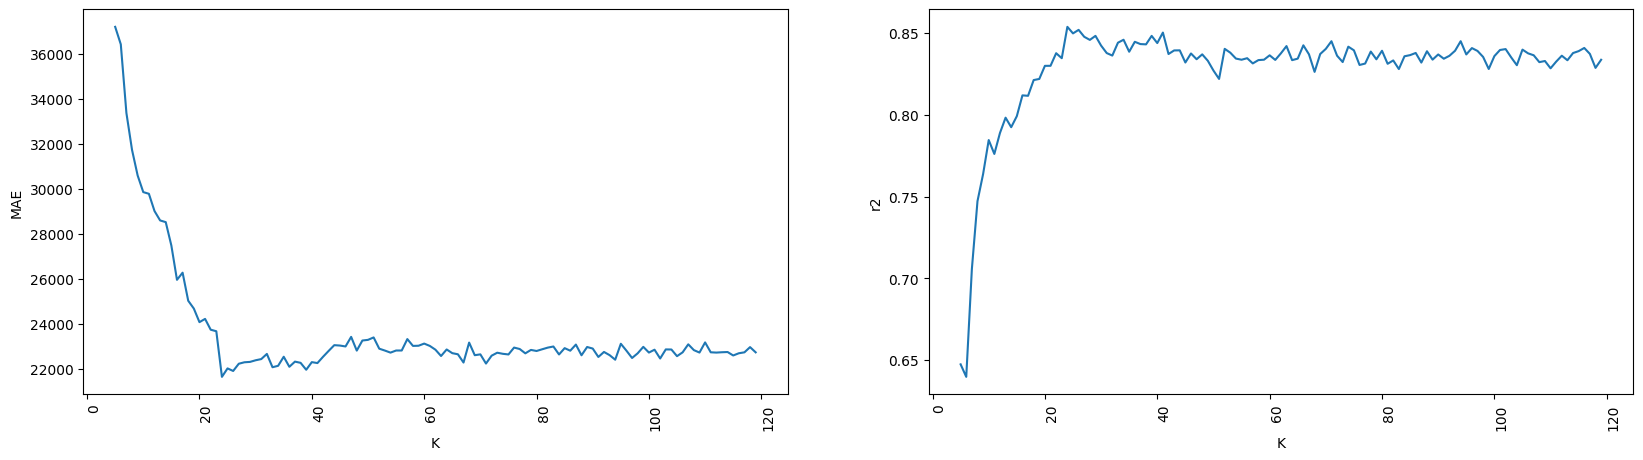

In [24]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

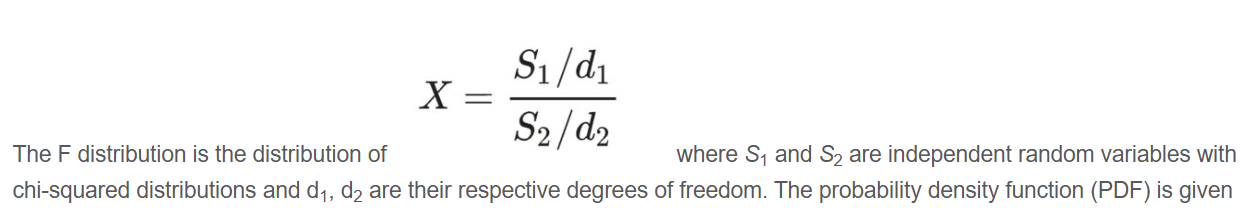

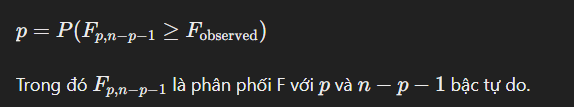

In [25]:
from sklearn.feature_selection import f_regression

In [26]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,34019.095684,48576.278165,0.692366
1,6,32773.639205,46782.243394,0.714669
2,7,32056.406894,45768.990711,0.726896
3,8,31456.236370,45595.904966,0.728957
4,9,31111.955719,44964.231128,0.736415
...,...,...,...,...
110,115,21986.861986,35579.352751,0.834963
111,116,21873.249863,35536.430167,0.835361
112,117,22155.971096,35963.905594,0.831376
113,118,22124.285651,36193.916825,0.829212


In [27]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
114,119,21611.933493,35455.729926,0.836108
97,102,21691.251027,35167.812393,0.838758
108,113,21736.327123,35741.252767,0.833457
101,106,21866.126370,36047.794724,0.830588
111,116,21873.249863,35536.430167,0.835361
...,...,...,...,...
8,13,31668.416963,46270.488766,0.720878
6,11,31846.290879,45815.068797,0.726345
2,7,32056.406894,45768.990711,0.726896
1,6,32773.639205,46782.243394,0.714669


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


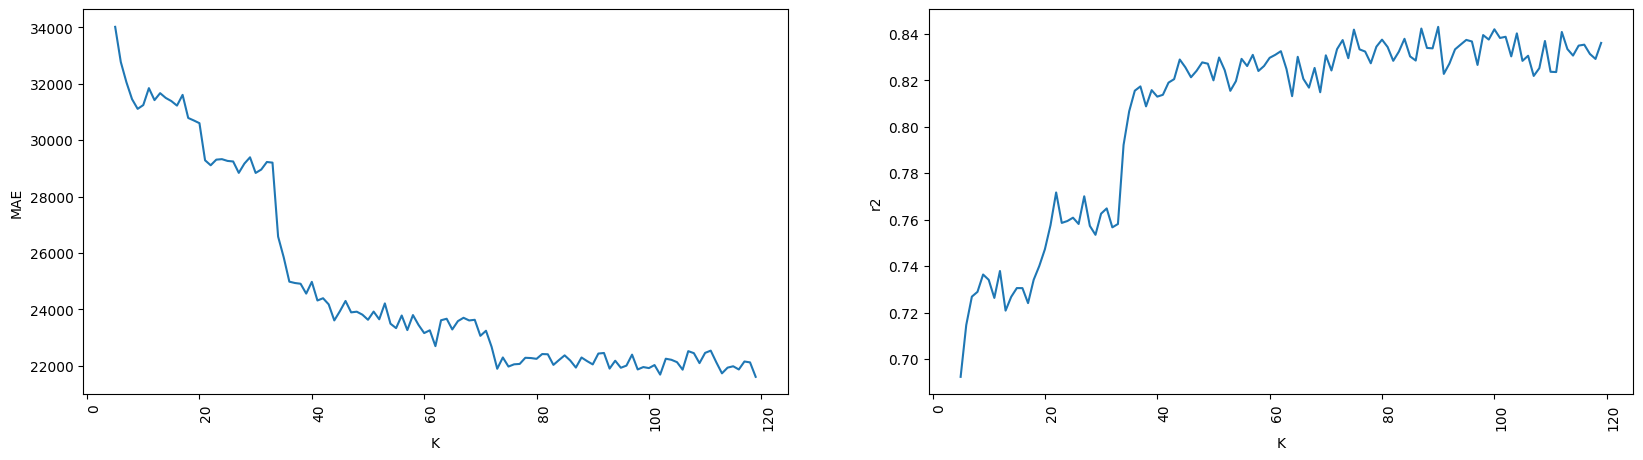

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

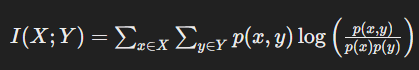

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

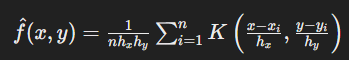

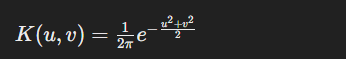

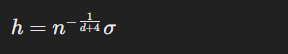

In [29]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,34109.925103,51834.843797,0.649708
1,6,33010.106575,50685.600501,0.665069
2,7,32648.519555,47621.990822,0.704334
3,8,32375.688847,47464.484689,0.706287
4,9,32026.196370,47761.813032,0.702595
...,...,...,...,...
110,115,22277.314555,36205.309539,0.829104
111,116,21958.039178,36017.236196,0.830875
112,117,22208.798082,36379.400951,0.827457
113,118,21210.138664,34426.344968,0.845486


In [32]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
113,118,21210.138664,34426.344968,0.845486
98,103,21665.875651,35246.168425,0.838039
107,112,21698.750308,35664.872508,0.834168
89,94,21773.464041,36083.799754,0.830250
102,107,21825.435411,36637.200453,0.825003
...,...,...,...,...
7,12,32059.411929,46289.260511,0.720651
3,8,32375.688847,47464.484689,0.706287
2,7,32648.519555,47621.990822,0.704334
1,6,33010.106575,50685.600501,0.665069


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_18764\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


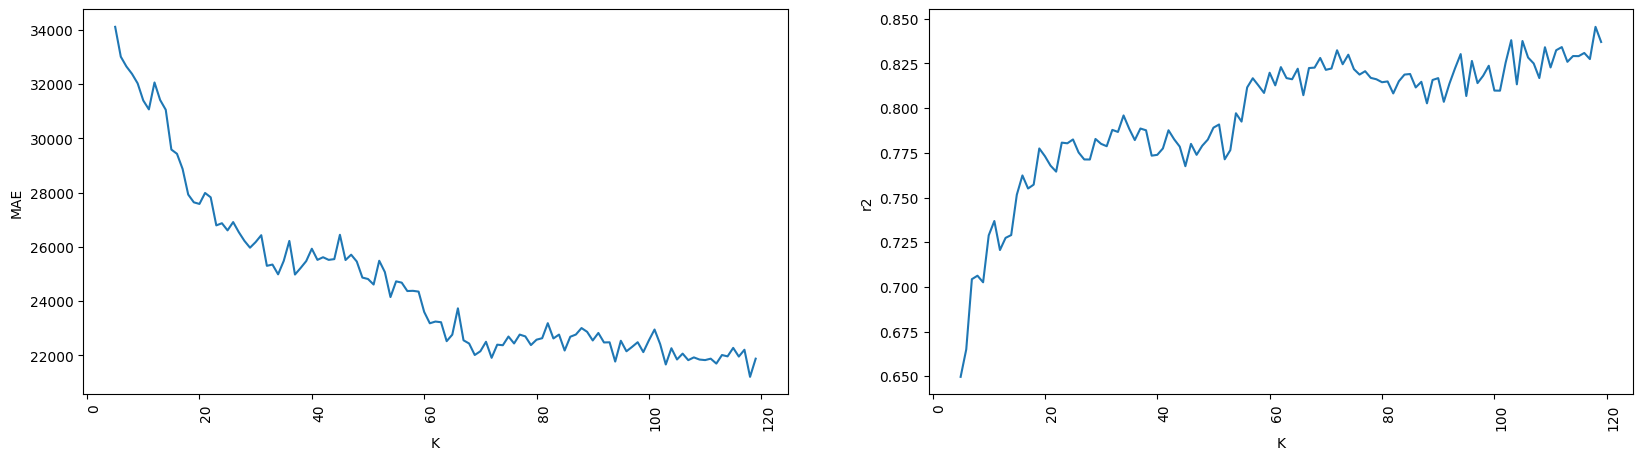

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [35]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365
1,6,22467.487432,36571.365078,0.825631
2,7,22144.440411,35750.971764,0.833367
3,8,21884.749212,35650.797243,0.834299
4,9,21576.374486,35468.768334,0.835987
...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850
111,116,19044.171986,32544.020187,0.861921
112,117,18947.229760,32021.032176,0.866323
113,118,19197.129555,32616.904006,0.861302


In [36]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23700.252911,37418.059496,0.817464
1,6,22717.849384,36141.022713,0.829711
2,7,21964.899110,32265.967403,0.864270
3,8,20352.471370,31322.142697,0.872095
4,9,19864.825000,30886.530579,0.875627
...,...,...,...,...
110,115,18168.850308,29400.927569,0.887304
111,116,18686.510171,31037.095503,0.874412
112,117,18308.297192,29435.314075,0.887040
113,118,18547.187877,30429.399339,0.879282


In [37]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,34109.925103,51834.843797,0.649708
1,6,33010.106575,50685.600501,0.665069
2,7,32648.519555,47621.990822,0.704334
3,8,32375.688847,47464.484689,0.706287
4,9,32026.196370,47761.813032,0.702595
...,...,...,...,...
110,115,22277.314555,36205.309539,0.829104
111,116,21958.039178,36017.236196,0.830875
112,117,22208.798082,36379.400951,0.827457
113,118,21210.138664,34426.344968,0.845486


In [38]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,22691.046096,35535.972163,0.835365,23700.252911,37418.059496,0.817464
1,6,22467.487432,36571.365078,0.825631,22717.849384,36141.022713,0.829711
2,7,22144.440411,35750.971764,0.833367,21964.899110,32265.967403,0.864270
3,8,21884.749212,35650.797243,0.834299,20352.471370,31322.142697,0.872095
4,9,21576.374486,35468.768334,0.835987,19864.825000,30886.530579,0.875627
...,...,...,...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850,18168.850308,29400.927569,0.887304
111,116,19044.171986,32544.020187,0.861921,18686.510171,31037.095503,0.874412
112,117,18947.229760,32021.032176,0.866323,18308.297192,29435.314075,0.887040
113,118,19197.129555,32616.904006,0.861302,18547.187877,30429.399339,0.879282


In [39]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365,23700.252911,37418.059496,0.817464,34109.925103,51834.843797,0.649708
1,6,22467.487432,36571.365078,0.825631,22717.849384,36141.022713,0.829711,33010.106575,50685.600501,0.665069
2,7,22144.440411,35750.971764,0.833367,21964.899110,32265.967403,0.864270,32648.519555,47621.990822,0.704334
3,8,21884.749212,35650.797243,0.834299,20352.471370,31322.142697,0.872095,32375.688847,47464.484689,0.706287
4,9,21576.374486,35468.768334,0.835987,19864.825000,30886.530579,0.875627,32026.196370,47761.813032,0.702595
...,...,...,...,...,...,...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850,18168.850308,29400.927569,0.887304,22277.314555,36205.309539,0.829104
111,116,19044.171986,32544.020187,0.861921,18686.510171,31037.095503,0.874412,21958.039178,36017.236196,0.830875
112,117,18947.229760,32021.032176,0.866323,18308.297192,29435.314075,0.887040,22208.798082,36379.400951,0.827457
113,118,19197.129555,32616.904006,0.861302,18547.187877,30429.399339,0.879282,21210.138664,34426.344968,0.845486


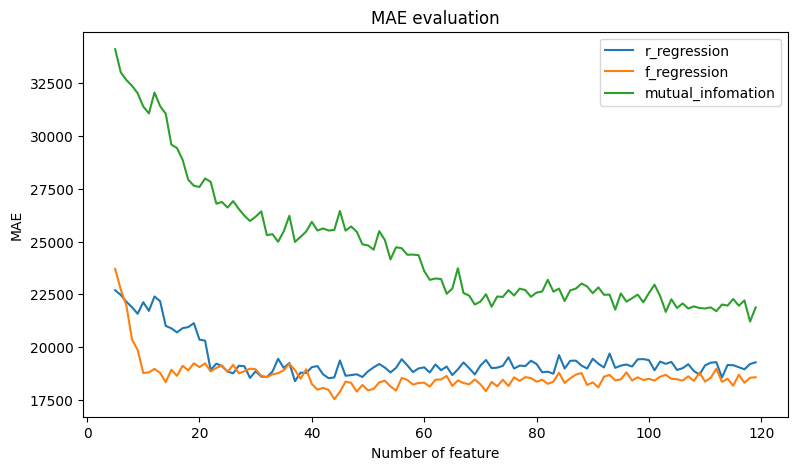

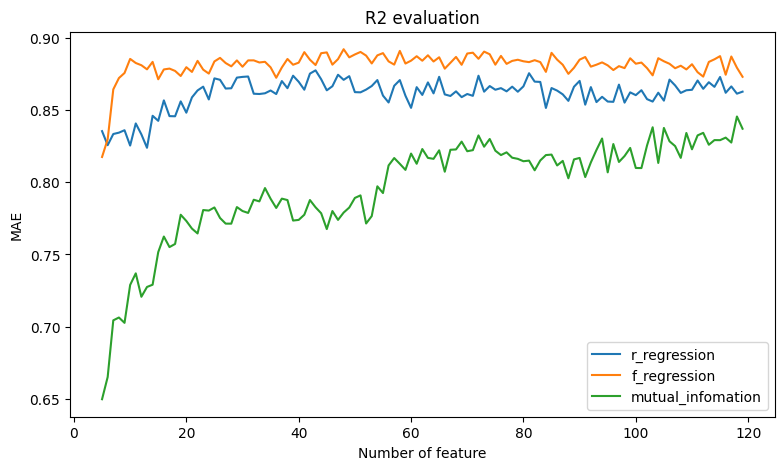

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()